In [1]:
# Python
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Anoconda\envs\tf2\lib\site-packages\fbprophet\forecaster.py:401: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



             ds      yhat  yhat_lower  yhat_upper
3400 2017-05-30  6.430230    5.598435    7.325605
3401 2017-05-31  6.236737    5.342191    7.098613
3402 2017-06-01  6.222610    5.374296    7.078205
3403 2017-06-02  6.215443    5.279336    7.060824
3404 2017-06-03  5.962184    5.180108    6.836145


D:\Anoconda\envs\tf2\lib\site-packages\fbprophet\forecaster.py:401: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

D:\Anoconda\envs\tf2\lib\site-packages\fbprophet\forecaster.py:401: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



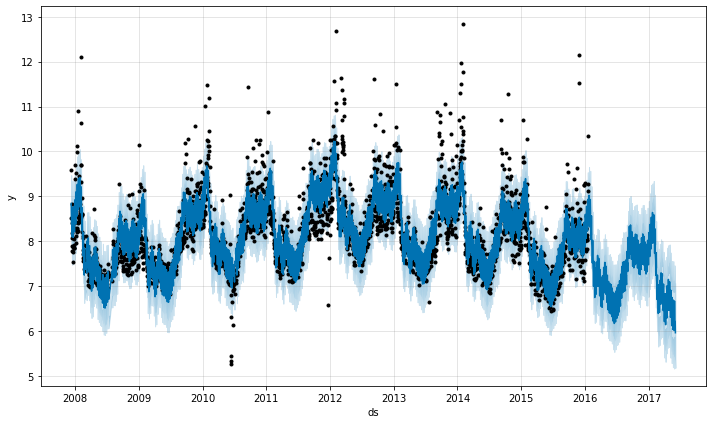

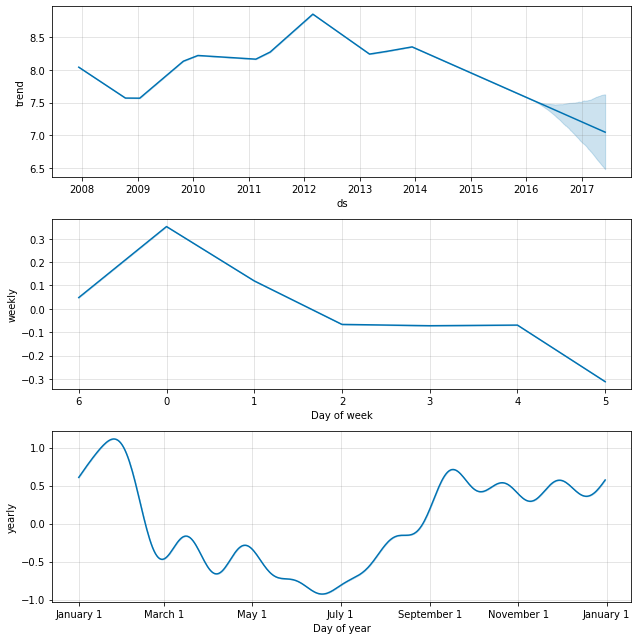

In [2]:
df=pd.read_csv('example_wp_log_peyton_manning.csv')
m = Prophet()
m.fit(df) # 默认情况下，这样做会自动包含历史数据的日期，因此我们也可以用来查看模型对于历史数据的拟合效果
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
fig1 = m.plot(forecast)
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
# forecast['yhat']  = forecast['trend'] +forecast['weekly'] + forecast['yearly']
# 如果有节假日因素，那么就会有forecast['yhat']  = forecast['trend'] +forecast['weekly'] + forecast['yearly'] + forecast['holidays']
fig2 = m.plot_components(forecast)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039129,8.223965,9.392471,8.039129,8.039129,0.802972,0.802972,0.802972,0.352288,0.352288,0.352288,0.450684,0.450684,0.450684,0.0,0.0,0.0,8.842101
1,2007-12-11,8.037591,7.930463,9.255386,8.037591,8.037591,0.553064,0.553064,0.553064,0.119634,0.119634,0.119634,0.433430,0.433430,0.433430,0.0,0.0,0.0,8.590655
2,2007-12-12,8.036053,7.780317,9.043509,8.036053,8.036053,0.350448,0.350448,0.350448,-0.066664,-0.066664,-0.066664,0.417112,0.417112,0.417112,0.0,0.0,0.0,8.386500
3,2007-12-13,8.034515,7.736329,9.003212,8.034515,8.034515,0.329912,0.329912,0.329912,-0.072261,-0.072261,-0.072261,0.402172,0.402172,0.402172,0.0,0.0,0.0,8.364426
4,2007-12-14,8.032977,7.754131,8.968158,8.032977,8.032977,0.319447,0.319447,0.319447,-0.069571,-0.069571,-0.069571,0.389018,0.389018,0.389018,0.0,0.0,0.0,8.352424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,2017-05-30,7.052393,5.555844,7.281478,6.431126,7.653595,-0.622163,-0.622163,-0.622163,0.119634,0.119634,0.119634,-0.741797,-0.741797,-0.741797,0.0,0.0,0.0,6.430230
3401,2017-05-31,7.051369,5.387465,7.168038,6.428690,7.654609,-0.814632,-0.814632,-0.814632,-0.066664,-0.066664,-0.066664,-0.747968,-0.747968,-0.747968,0.0,0.0,0.0,6.236737
3402,2017-06-01,7.050345,5.334080,7.075621,6.425809,7.655623,-0.827735,-0.827735,-0.827735,-0.072261,-0.072261,-0.072261,-0.755475,-0.755475,-0.755475,0.0,0.0,0.0,6.222610
3403,2017-06-02,7.049322,5.375306,7.111917,6.422995,7.656637,-0.833879,-0.833879,-0.833879,-0.069571,-0.069571,-0.069571,-0.764308,-0.764308,-0.764308,0.0,0.0,0.0,6.215443


In [6]:
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [7]:
help(Prophet.fit)  # 默认情况下， Prophet 使用线性模型进行预测

Help on function fit in module fbprophet.forecaster:

fit(self, df, **kwargs)
    Fit the Prophet model.
    
    This sets self.params to contain the fitted model parameters. It is a
    dictionary parameter names as keys and the following items:
        k (Mx1 array): M posterior samples of the initial slope.
        m (Mx1 array): The initial intercept.
        delta (MxN array): The slope change at each of N changepoints.
        beta (MxK matrix): Coefficients for K seasonality features.
        sigma_obs (Mx1 array): Noise level.
    Note that M=1 if MAP estimation.
    
    Parameters
    ----------
    df: pd.DataFrame containing the history. Must have columns ds (date
        type) and y, the time series. If self.growth is 'logistic', then
        df must also have a column cap that specifies the capacity at
        each ds.
    kwargs: Additional arguments passed to the optimizing or sampling
        functions in Stan.
    
    Returns
    -------
    The fitted Prophet objec

## 饱和预测
### 预测饱和增长
#### 1. 使用 logistic 增长 趋势模型进行预测，同时指定承载能力

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


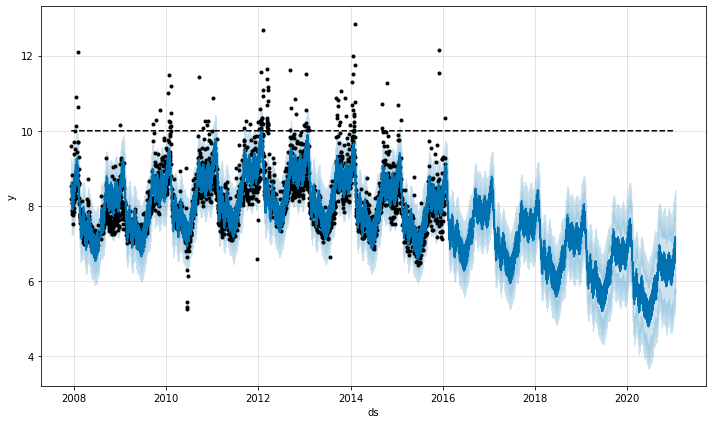

In [8]:
df['cap']=10  #  历史数据的承载能力。注意：cap 也可以是不断增长的序列
m = Prophet(growth='logistic')
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 10
fcst = m.predict(future)
fig = m.plot(fcst)

#### 2. logistic增长模型还可以处理饱和最小值

In [ ]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

# 趋势突变点
## 1. 自动检测突变点
首先是通过在大量潜在的突变点（变化速率突变）中进行识别来监测突变点的。之后对趋势变化的幅度做稀疏先验（等同于 L1 正则化）。
虽然存在很多变化速率可能会突变的点，但由于做了稀疏先验，绝大多数突变点并不会包含在建模过程中

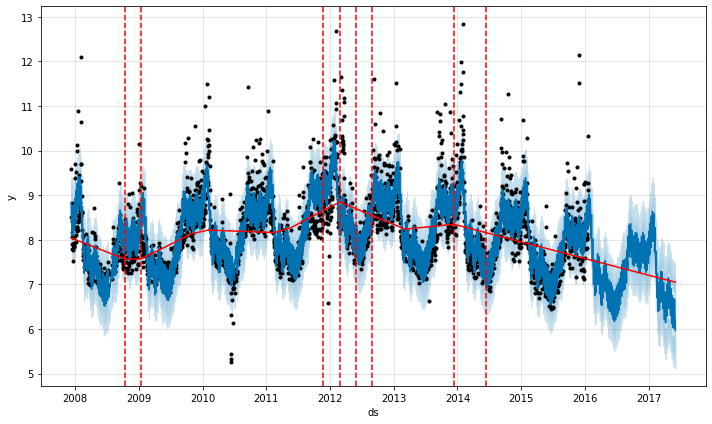

In [9]:
# 1. 默认情况下，只有在时间序列的前80%才会推断出突变点，以便有足够的长度来预测未来的趋势，并避免在时间序列的末尾出现过度拟合的波动
# 2. 也可以使用changepoint_range参数进行更改，m = Prophet(changepoint_range=0.9)意味着将在时间序列的前90%处寻找潜在的变化点
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## 2. 调整趋势的灵活性
如果趋势的变化被过度拟合（即过于灵活）或者拟合不足（即灵活性不够），可以利用输入参数 changepoint_prior_scale 来调整稀疏先验的程度

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


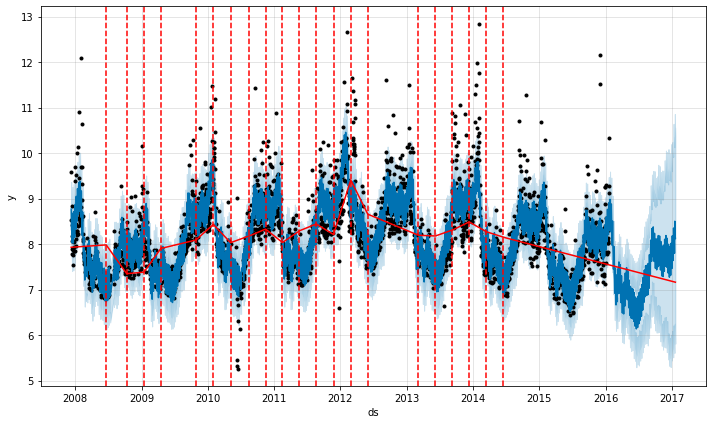

In [12]:
m = Prophet(changepoint_prior_scale=0.5)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### 3. 指定趋势点的位置
手动指定潜在突变点的位置(只能指定一个点分析)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


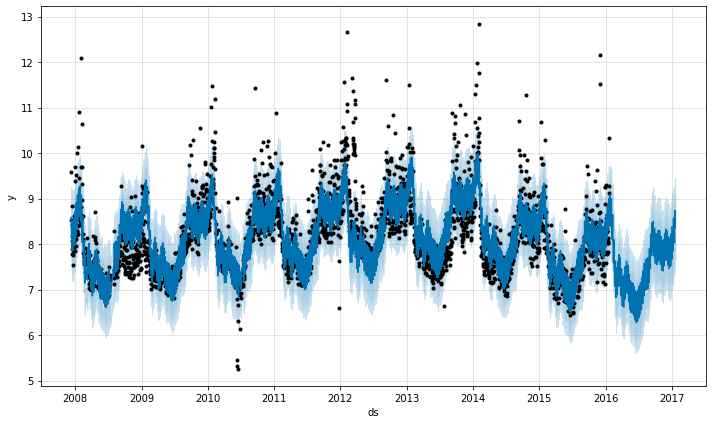

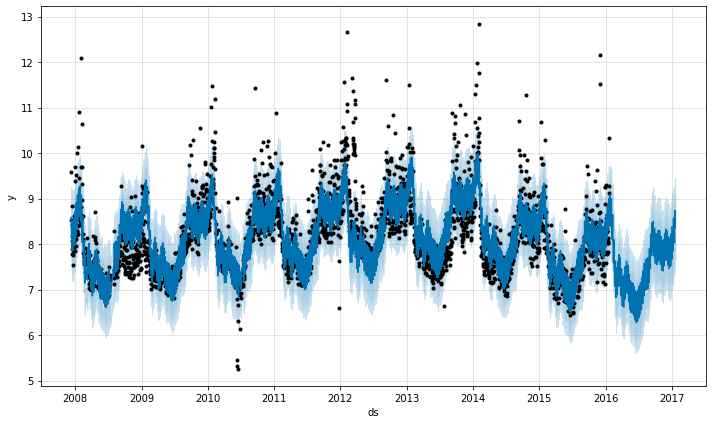

In [13]:
m = Prophet(changepoints=['2014-01-01','2015-02-01'])
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

## 对假期、特征时间建模

In [14]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [16]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
 
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast=m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,1.223478,1.202807
2191,2014-02-03,1.901743,1.461349
2532,2015-01-11,1.223478,0.000000
2533,2015-01-12,1.901743,0.000000
2901,2016-01-17,1.223478,0.000000
2902,2016-01-18,1.901743,0.000000
2908,2016-01-24,1.223478,0.000000
2909,2016-01-25,1.901743,0.000000
2922,2016-02-07,1.223478,1.202807
2923,2016-02-08,1.901743,1.461349


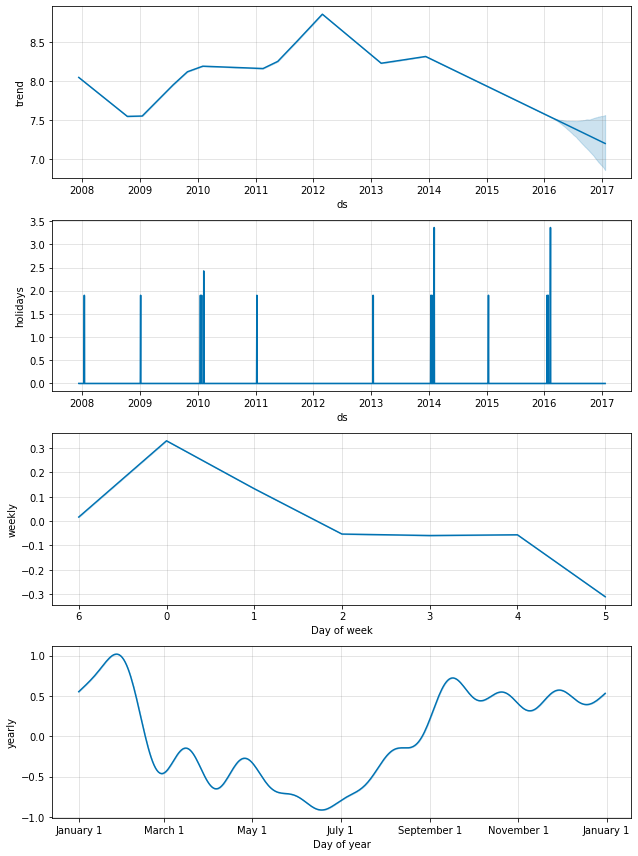

In [18]:
fig = m.plot_components(forecast)

## 季节性傅里叶级数

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


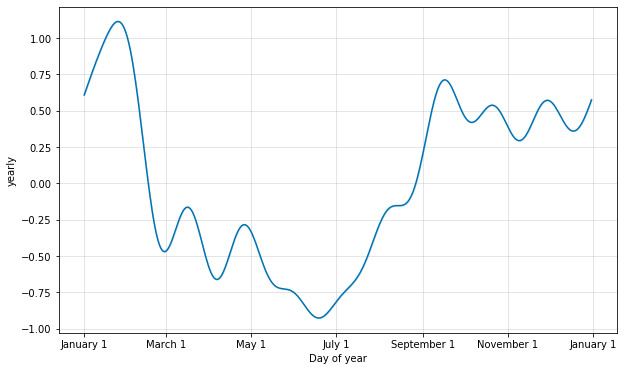

In [20]:
from fbprophet.plot import plot_yearly
m = Prophet(yearly_seasonality=10).fit(df)  ## 为每个内置季节性指定傅立叶级数，默认值10
a = plot_yearly(m)

## 对节假日和季节性设定先验规模
如果发现节假日效应被过度拟合了，通过设置参数 holidays_prior_scale 可以调整它们的先验规模来使之平滑，默认下该值取 10 ，减少这个参数会降低假期效果

In [21]:
m = Prophet(holidays=holidays, holidays_prior_scale=0.05).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,playoff,superbowl
2190,2014-02-02,1.206462,0.962911
2191,2014-02-03,1.852808,0.992123
2532,2015-01-11,1.206462,0.000000
2533,2015-01-12,1.852808,0.000000
2901,2016-01-17,1.206462,0.000000
2902,2016-01-18,1.852808,0.000000
2908,2016-01-24,1.206462,0.000000
2909,2016-01-25,1.852808,0.000000
2922,2016-02-07,1.206462,0.962911
2923,2016-02-08,1.852808,0.992123


## 附加的回归量
可以使用add_regressor方法将附加的回归量添加到模型的线性部分。包含回归值的列需要同时出现在拟合数据格式（fit）和预测数据格式(predict)中

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


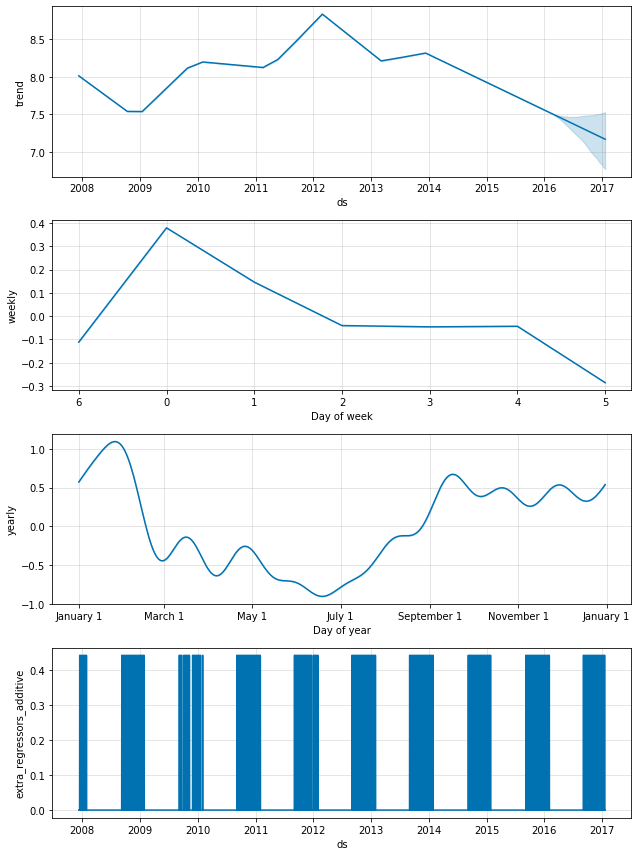

In [22]:
# 判断是否是NFL赛季的周日
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)
 
m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
forecast = m.predict(future)
fig = m.plot_components(forecast)

# 乘法季节性
季节性并不是Prophet所假定的是一个恒定的加性因子，而是随着趋势在增长

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


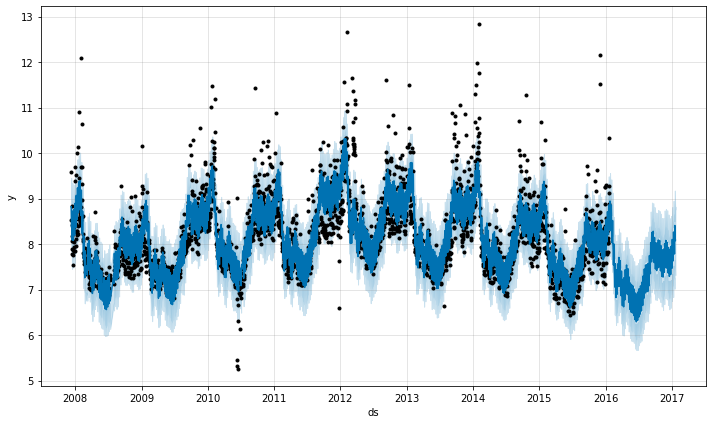

In [25]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(365,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)

## 预测区间
在预测时，不确定性主要来源于三个部分：趋势中的不确定性、季节效应估计中的不确定性和观测值的噪声影响
### 趋势的不确定性


In [26]:
m = Prophet(interval_width=0.95).fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 季节的不确定性
必须使用贝叶斯取样的方法来得到季节效应的不确定性，可通过设置 mcmc.samples 参数（默认下取 0 ）来实现
下面代码将默认的最大后验估计（ MAP ）取代为马尔科夫蒙特卡洛取样 （ MCMC ）
（计算速度极慢）

In [ ]:
m = Prophet(mcmc_samples=500).fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## 异常值

In [15]:
import datetime
import warnings
warnings.filterwarnings('ignore')
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01')]

,ds,y
716,2010-01-02,NaN
717,2010-01-03,NaN
718,2010-01-04,NaN
719,2010-01-05,NaN
720,2010-01-06,NaN
...,...,...
1064,2010-12-27,NaN
1065,2010-12-28,NaN
1066,2010-12-29,NaN
1067,2010-12-30,NaN


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


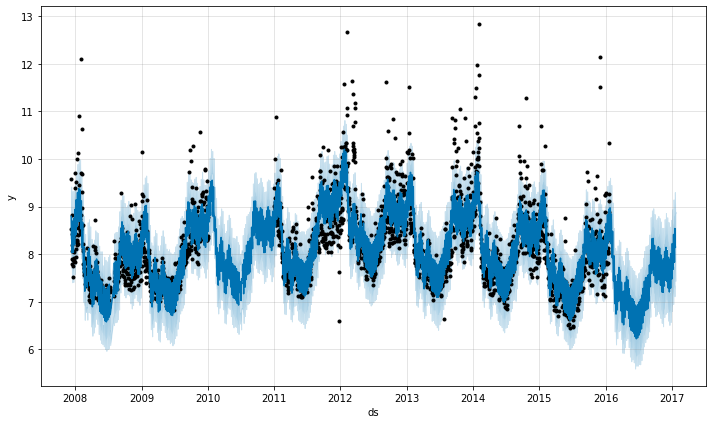

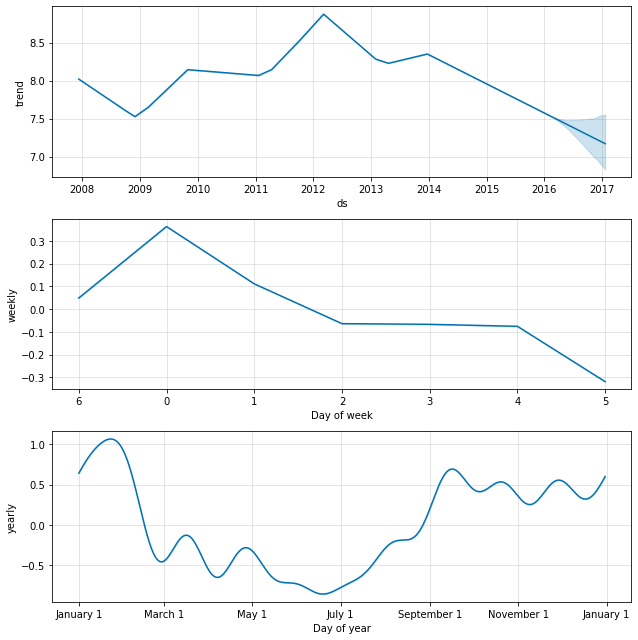

In [16]:
model = Prophet().fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig1=model.plot(forecast)
fig2=model.plot_components(forecast)

## 诊断
Prophet包含时间序列交叉验证功能，以测量使用历史数据的预测误差

In [17]:
df=pd.read_csv('example_wp_log_peyton_manning.csv')
data1=df.copy()
data2=df.copy()
data1=df[(df['ds']>='2007-12-10')&(df['ds']<='2013-01-01')].reset_index()
del data1['index']


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


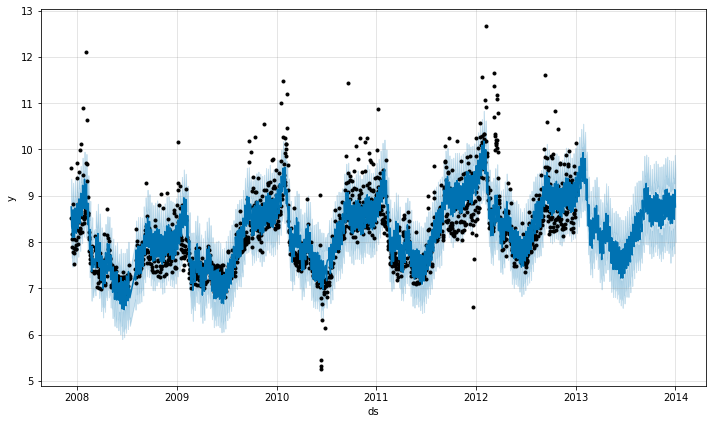

In [25]:
import numpy as np
model = Prophet().fit(data1)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig1=model.plot(forecast)
x=np.arange('2007-12-10','2016-01-20',dtype='datetime64[D]')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 5 forecasts with cutoffs between 2010-01-12 00:00:00 and 2012-01-02 00:00:00


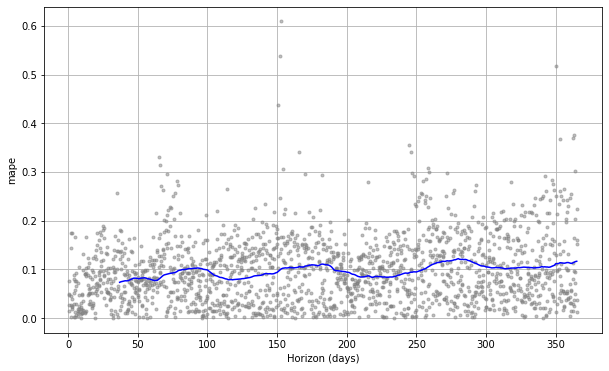

In [26]:
df=pd.read_csv('example_wp_log_peyton_manning.csv')
m = Prophet().fit(data1)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
# initial代表了一开始的时间是多少，period代表每隔多长时间设置一个cutoff，horizon代表每次从cutoff往后预测多少天
df_cv
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')